In [17]:
import pandas as pd
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
import os

# Définir le chemin d'accès
raw_data_path = "../../data/raw"

# Lister les fichiers présents
files = os.listdir(raw_data_path)
print("Fichiers trouvés :", files)

# Lire les fichiers avec gestion d’erreurs et bon séparateur
dfs = {}
for file in files:
    full_path = os.path.join(raw_data_path, file)
    try:
        if file.endswith(".csv"):
            dfs[file] = pd.read_csv(full_path, sep=";", on_bad_lines='skip', engine='python')
        elif file.endswith((".xls", ".xlsx")):
            dfs[file] = pd.read_excel(full_path)
        print(f"{file} chargé avec succès. Dimensions : {dfs[file].shape}")
    except Exception as e:
        print(f"Erreur lors du chargement de {file} : {e}")
    print(f"Header du fichier {file} :")
    print(dfs[file].head())

# Comparaison des lignes si les deux fichiers ont été lus
if len(dfs) == 2:
    keys = list(dfs.keys())
    df1, df2 = dfs[keys[0]], dfs[keys[1]]

    # Normalisation des noms de colonnes
    df1.columns = df1.columns.str.strip().str.lower()
    df2.columns = df2.columns.str.strip().str.lower()

    # Colonnes communes
    common_cols = df1.columns.intersection(df2.columns)
    df1_common = df1[common_cols]
    df2_common = df2[common_cols]

    # Ajuster à la même longueur pour comparaison
    min_len = min(len(df1_common), len(df2_common))
    df1_common = df1_common.head(min_len)
    df2_common = df2_common.head(min_len)

    # Comparaison ligne à ligne
    diff_rows = ~(df1_common == df2_common).all(axis=1)
    nb_diff = diff_rows.sum()

    print("\nComparaison des données :")
    print(f"- Colonnes communes : {len(common_cols)}")
    print(f"- Nombre de lignes comparées : {min_len}")
    print(f"- Nombre de lignes différentes : {nb_diff}")
else:
    print("\nComparaison impossible : les deux fichiers n'ont pas été lus correctement ou sont absents.")

Fichiers trouvés : ['Classeur1.csv', 'Classeur1.xlsx']
Classeur1.csv chargé avec succès. Dimensions : (396030, 26)
Header du fichier Classeur1.csv :
   loan_amnt        term  int_rate  installment grade sub_grade  \
0     100000   36 months      1144        32948     B        B4   
1      80000   36 months      1199        26568     B        B5   
2     156000   36 months      1049        50697     B        B3   
3      72000   36 months       649        22065     A        A2   
4     243750   60 months      1727        60933     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT     1170000  ...   
1          Credit analyst     4 years       MORTGAGE      650000  ...   
2             Statistician   < 1 year           RENT      430570  ...   
3          Client Advocate    6 years           RENT      540000  ...   
4  Destiny Management Inc.    9 years       MORTGAGE      550000  ...   

  earlies

In [16]:
# Lecture du fichier CSV avec DuckDB (détection auto du séparateur)
file_path = "../../data/raw/Classeur1.csv"

# Utilise le bon séparateur (ici ; d'après ton exemple)
con = duckdb.connect()
df = con.execute(f"""
    SELECT * FROM read_csv_auto('{file_path}', delim=';', header=True)
""").fetchdf()

# Aperçu du fichier
print("Aperçu des données :")
display(df.head())

# Infos générales
print("\nInfos générales :")
print(df.info())

# Statistiques numériques
print("\nStatistiques descriptives (variables numériques) :")
display(df.describe())

# Pourcentage de valeurs manquantes
print("\nPourcentage de valeurs manquantes :")
missing = df.isnull().mean().sort_values(ascending=False) * 100
display(missing[missing > 0])

# Valeurs uniques par colonne (pour repérer les colonnes avec peu ou trop de variété)
print("\nNombre de valeurs uniques par colonne :")
unique_counts = df.nunique().sort_values()
display(unique_counts)


Aperçu des données :


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,100000,36 months,1144,32948,B,B4,Marketing,10+ years,RENT,1170000,...,01-06-90,160,0,363690,418,250,w,INDIVIDUAL,0,0
1,80000,36 months,1199,26568,B,B5,Credit analyst,4 years,MORTGAGE,650000,...,01-07-04,170,0,201310,533,270,f,INDIVIDUAL,30,0
2,156000,36 months,1049,50697,B,B3,Statistician,< 1 year,RENT,430570,...,01-08-07,130,0,119870,922,260,f,INDIVIDUAL,0,0
3,72000,36 months,649,22065,A,A2,Client Advocate,6 years,RENT,540000,...,01-09-06,60,0,54720,215,130,f,INDIVIDUAL,0,0
4,243750,60 months,1727,60933,C,C5,Destiny Management Inc.,9 years,MORTGAGE,550000,...,01-03-99,130,0,245840,698,430,f,INDIVIDUAL,10,0



Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  int64         
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  int64         
 3   installment           396030 non-null  int64         
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  int64         
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[us]
 12  loan_status           396030 non-null  

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.0,396030.000000,358235.0,395495.0
mean,141138.880893,1250.175714,39314.077666,7.782099e+05,2001-06-30 17:23:59.181880,1562.102119,113.111532,1.781910,1.584454e+05,538.331332,254.147438,18.139908,1.216476
min,5000.000000,60.000000,285.000000,0.000000e+00,2001-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.0,20.000000,0.0,0.0
25%,80000.000000,967.000000,19926.000000,4.500000e+05,2001-04-12 00:00:00,881.000000,80.000000,0.000000,6.025000e+04,358.0,170.000000,0.0,0.0
50%,120000.000000,1299.000000,34465.000000,6.463500e+05,2001-07-13 00:00:00,1552.000000,100.000000,0.000000,1.118100e+05,548.0,240.000000,10.0,0.0
75%,200000.000000,1588.000000,53906.000000,9.000000e+05,2001-10-12 00:00:00,2209.000000,140.000000,0.000000,1.962000e+05,729.0,320.000000,30.0,0.0
max,400000.000000,3099.000000,153381.000000,8.706582e+07,2001-12-16 00:00:00,99990.000000,900.000000,860.000000,1.743266e+07,9446.0,1510.000000,340.0,80.0
std,83574.413411,539.828663,26412.949444,8.137573e+05,NaN,925.265762,51.376488,5.306706,2.059184e+05,248.238561,118.869907,21.479305,3.561743



Pourcentage de valeurs manquantes :


mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64


Nombre de valeurs uniques par colonne :


term                         2
loan_status                  2
initial_list_status          2
verification_status          3
application_type             3
home_ownership               6
grade                        7
pub_rec_bankruptcies         9
emp_length                  11
purpose                     14
pub_rec                     20
mort_acc                    33
sub_grade                   35
open_acc                    61
issue_d                    115
total_acc                  118
int_rate                   566
earliest_cr_line           684
revol_util                1202
loan_amnt                 1397
dti                       3874
annual_inc               27197
title                    48817
installment              53831
revol_bal                55622
emp_title               173105
dtype: int64

C:\Users\Pierre\AppData\Local\Temp\ipykernel_8848\2129117652.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_counts, x="grade", y="count", palette="Blues_d")


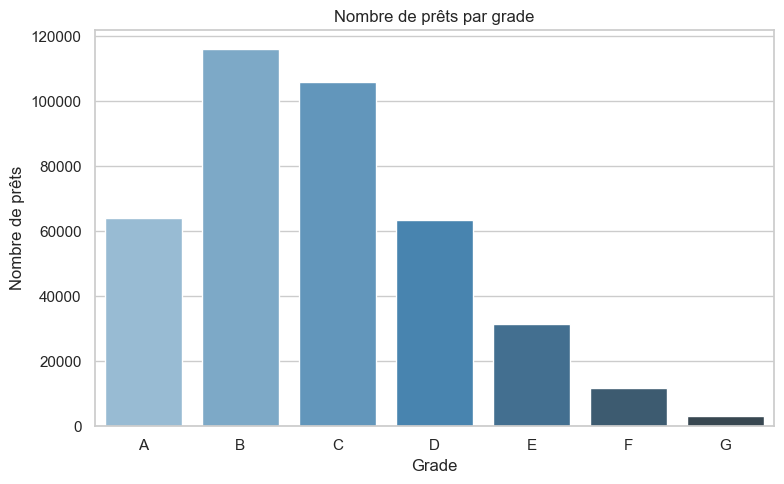

C:\Users\Pierre\AppData\Local\Temp\ipykernel_8848\2129117652.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subgrade_counts, x="sub_grade", y="count", palette="viridis")


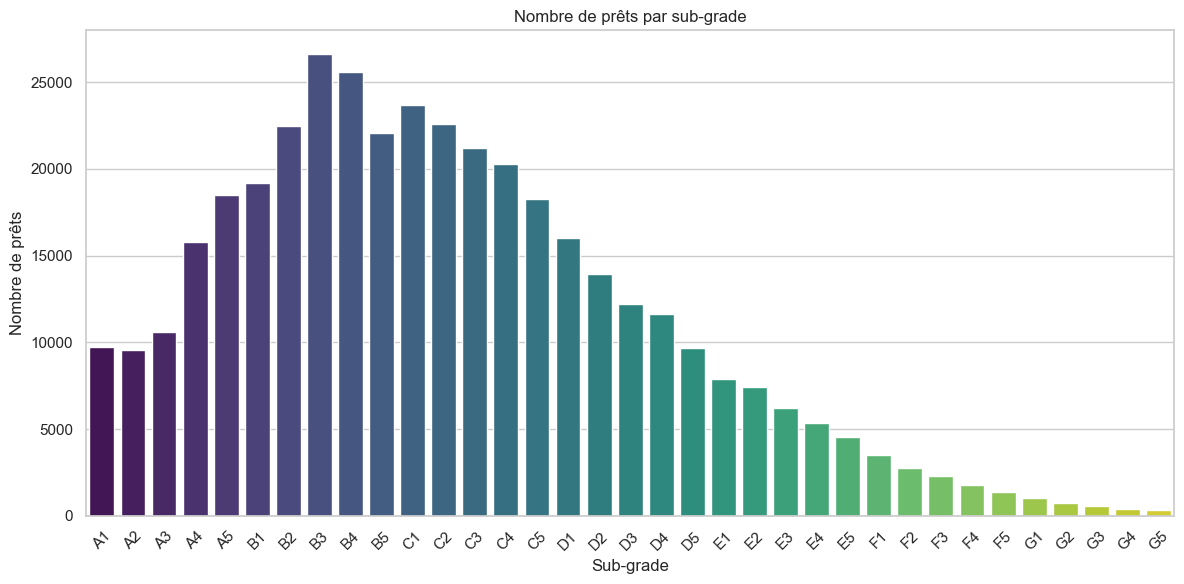

In [ ]:
# Requête pour compter par grade et sub_grade
grade_counts = con.execute(f"""
    SELECT grade, COUNT(*) AS count
    FROM read_csv_auto('{file_path}', delim=';', header=True)
    GROUP BY grade
    ORDER BY grade
""").fetchdf()

subgrade_counts = con.execute(f"""
    SELECT sub_grade, COUNT(*) AS count
    FROM read_csv_auto('{file_path}', delim=';', header=True)
    GROUP BY sub_grade
    ORDER BY sub_grade
""").fetchdf()

# Style graphique
sns.set(style="whitegrid")

# Barplot des grades
plt.figure(figsize=(8, 5))
sns.barplot(data=grade_counts, x="grade", y="count", palette="Blues_d")
plt.title("Nombre de prêts par grade")
plt.xlabel("Grade")
plt.ylabel("Nombre de prêts")
plt.tight_layout()
plt.show()

# Barplot des sub_grades
plt.figure(figsize=(12, 6))
sns.barplot(data=subgrade_counts, x="sub_grade", y="count", palette="viridis")
plt.title("Nombre de prêts par sub-grade")
plt.xlabel("Sub-grade")
plt.ylabel("Nombre de prêts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  grade  avg_loan_amnt  avg_int_rate
0     A  132947.345257    551.714989
1     B  128957.107949   1117.983589
2     C  137613.370036   1314.328125
3     D  146954.029186   1709.245655
4     E  177235.954967   1649.245998
5     F  192115.061162   2030.029562
6     G  208799.525213   2056.043222


C:\Users\Pierre\AppData\Local\Temp\ipykernel_8848\1942238645.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_by_grade, x="grade", y="avg_loan_amnt", palette="Blues_d")


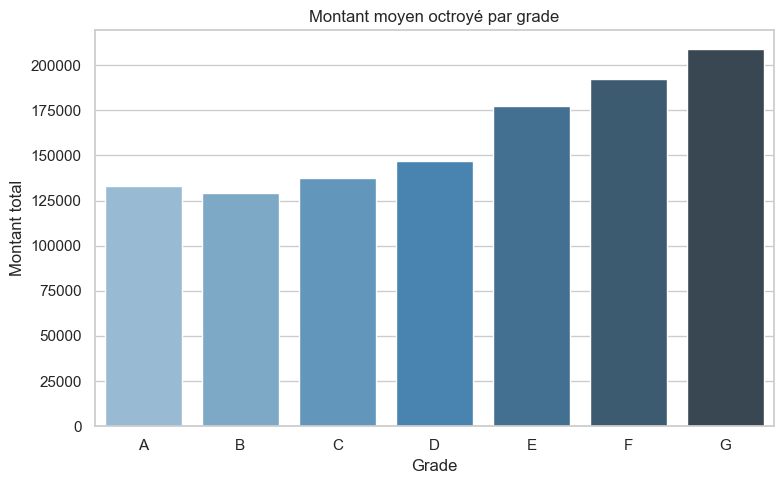

C:\Users\Pierre\AppData\Local\Temp\ipykernel_8848\1942238645.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats_by_grade, x="grade", y="avg_int_rate", palette="Reds")


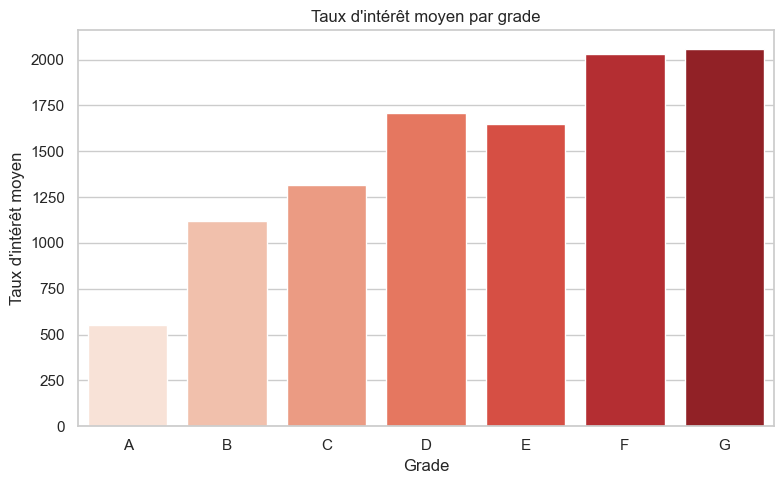

In [ ]:
# Requête montant moyen et taux d'intérêt moyen par grade
stats_by_grade = con.execute(f"""
    SELECT
        grade,
        AVG(loan_amnt) AS avg_loan_amnt,
        AVG(int_rate) AS avg_int_rate
    FROM read_csv_auto('{file_path}', delim=';', header=True)
    GROUP BY grade
    ORDER BY grade
""").fetchdf()

print(stats_by_grade)

# Barplot : Montant moyen des prêts par grade
plt.figure(figsize=(8, 5))
sns.barplot(data=stats_by_grade, x="grade", y="avg_loan_amnt", palette="Blues_d")
plt.title("Montant moyen octroyé par grade")
plt.xlabel("Grade")
plt.ylabel("Montant total")
plt.tight_layout()
plt.show()

# Barplot : Taux d'intérêt moyen par grade
plt.figure(figsize=(8, 5))
sns.barplot(data=stats_by_grade, x="grade", y="avg_int_rate", palette="Reds")
plt.title("Taux d'intérêt moyen par grade")
plt.xlabel("Grade")
plt.ylabel("Taux d'intérêt moyen")
plt.tight_layout()
plt.show()

In [ ]:
# Liste des intitulés de poste avec leur nombre d'occurrences
job_counts = con.execute(f"""
    SELECT
        emp_title,
        COUNT(*) AS occurrences
    FROM read_csv_auto('{file_path}', delim=';', header=True)
    WHERE emp_title IS NOT NULL
    GROUP BY emp_title
    ORDER BY occurrences DESC
""").fetchdf()

# Affiche les 20 premiers résultats
print(job_counts.head(20))

                   emp_title  occurrences
0                    Teacher         4389
1                    Manager         4250
2           Registered Nurse         1856
3                         RN         1846
4                 Supervisor         1830
5                      Sales         1638
6            Project Manager         1505
7                      Owner         1410
8                     Driver         1339
9             Office Manager         1218
10                   manager         1145
11                  Director         1089
12           General Manager         1074
13                  Engineer          995
14                   teacher          962
15                    driver          882
16            Vice President          857
17        Operations Manager          763
18  Administrative Assistant          756
19                Accountant          748
